In [136]:
import pandas as pd
import numpy as np
import missingno as msno
import matplotlib.pyplot as plt

In [137]:
df = pd.read_csv('beasiswa_saw_updated.csv')
df

,Nama,Nilai,Umur,Penghasilan_Ayah,Penghasilan_Ibu,Saudara
0,Aditya Pratama,88,21,5173433,5697704,2
1,Siti Aisyah,64,23,8039268,5008178,1
2,Bima Sakti,68,20,5633945,941288,0
3,Nadia Putri,98,24,699925,4926472,5
4,Rizky Ramadhan,94,19,7741033,7604861,5
5,Laila Sari,86,21,3508411,5601374,0
6,Arif Hidayat,86,24,2138905,4151206,5
7,Dinda Permata,68,21,8899654,1942588,3
8,Fajar Nugroho,92,18,6505806,581073,2
9,Rina Amelia,62,23,581694,6861610,3


In [138]:
df.describe()

,Nilai,Umur,Penghasilan_Ayah,Penghasilan_Ibu,Saudara
count,50.000000,50.000000,5.000000e+01,5.000000e+01,50.000000
mean,76.620000,20.700000,4.855158e+06,4.083933e+06,2.460000
std,14.652283,2.022829,3.014765e+06,2.332851e+06,1.656281
min,52.000000,18.000000,1.541360e+05,2.097890e+05,0.000000
25%,62.250000,19.000000,2.928186e+06,1.954067e+06,1.000000
50%,78.000000,20.500000,4.611212e+06,4.543149e+06,3.000000
75%,89.000000,22.750000,7.206864e+06,5.880285e+06,4.000000
max,99.000000,24.000000,9.872257e+06,7.769269e+06,5.000000


In [139]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 6 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Nama              50 non-null     object
 1   Nilai             50 non-null     int64 
 2   Umur              50 non-null     int64 
 3   Penghasilan_Ayah  50 non-null     int64 
 4   Penghasilan_Ibu   50 non-null     int64 
 5   Saudara           50 non-null     int64 
dtypes: int64(5), object(1)
memory usage: 2.5+ KB


In [140]:
print(df.isnull().sum())

Nama                0
Nilai               0
Umur                0
Penghasilan_Ayah    0
Penghasilan_Ibu     0
Saudara             0
dtype: int64


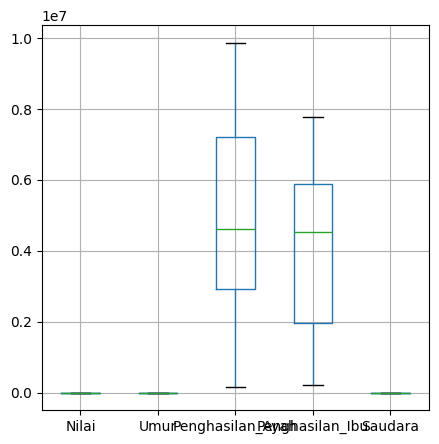

In [141]:
# memvisualisasikan outlier menggunakan boxplot untuk kolom-kolom numerik seperti Age, SibSp, Parch, dan Fare.
plt.figure(figsize=(5,5))
df.boxplot()
plt.show()

In [142]:
# 2. Bobot dan kriteria
bobot = {
    'Nilai': 0.3,
    'Umur': 0.1,
    'Penghasilan_Ayah': 0.2,
    'Penghasilan_Ibu': 0.2,
    'Saudara': 0.2 }

In [143]:
kriteria = {
    'Nilai': 'benefit',
    'Umur': 'cost',
    'Penghasilan_Ayah': 'cost',
    'Penghasilan_Ibu': 'cost',
    'Saudara': 'benefit'
}

In [144]:
# 3. Normalisasi
normalisasi = pd.DataFrame()
for kolom in bobot:
    if kriteria[kolom] == 'benefit':
        normalisasi[kolom] = df[kolom] / df[kolom].max()
    else:
        normalisasi[kolom] = df[kolom].min() / df[kolom]

In [145]:
# 4. Skor akhir dan ranking
for kolom in bobot:
    normalisasi[kolom] *= bobot[kolom]

df['Skor_Akhir'] = normalisasi.sum(axis=1)
df['Ranking'] = df['Skor_Akhir'].rank(ascending=False).astype(int)

In [146]:
# 5. Hasil akhir
df.sort_values(by='Ranking')[['Nama', 'Skor_Akhir', 'Ranking']]

,Nama,Skor_Akhir,Ranking
34,Denny Prasetyo,0.661101,1
11,Maya Indah,0.655808,2
3,Nadia Putri,0.624530,3
43,Della Ramadhani,0.619935,4
4,Rizky Ramadhan,0.589085,5
35,Elsa Marina,0.587368,6
15,Citra Lestari,0.580868,7
19,Tiara Dewi,0.570891,8
40,Jaka Taruna,0.570150,9
24,Agung Setiawan,0.570043,10


In [147]:
df.to_csv('hasil_ranking.csv', index=False)